In [2]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("mahi.csv")
print(data.head())

   Sr. No.        Date      Versus                                   Ground  \
0      1.0  23/12/2004  Bangladesh                          MA Aziz Stadium   
1      2.0  26/12/2004  Bangladesh             Bangabandhu National Stadium   
2      3.0  27/12/2004  Bangladesh             Bangabandhu National Stadium   
3      4.0  02/04/2005    Pakistan                    Nehru Stadium (Kochi)   
4      5.0  05/04/2005    Pakistan  Dr YS Rajasekhara Reddy Cricket Stadium   

              Coordinates  D/N                        How Dismissed Runs  B/F  \
0                  #NAME?   No                              run out    0    1   
1  23.7282° N, 90.4133° E  Yes  c Habibul Bashar b Mashrafe Mortaza   12   11   
2  23.7282° N, 90.4133° E  Yes                              not out    7    2   
3   9.9973° N, 76.3007° E   No       c Naved-ul-Hasan b Arshad Khan    3    7   
4  17.7977° N, 83.3523° E   No     c Shoaib Malik b Mohammad Hafeez  148  123   

      S/R   Aggr    Avg   S/R.1  
0   

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sr. No.        350 non-null    float64
 1   Date           350 non-null    object 
 2   Versus         350 non-null    object 
 3   Ground         350 non-null    object 
 4   Coordinates    350 non-null    object 
 5   D/N            350 non-null    object 
 6   How Dismissed  350 non-null    object 
 7   Runs           350 non-null    object 
 8   B/F            351 non-null    object 
 9   S/R            350 non-null    object 
 10  Aggr           350 non-null    float64
 11  Avg            350 non-null    float64
 12  S/R.1          350 non-null    float64
dtypes: float64(4), object(9)
memory usage: 35.8+ KB


In [6]:
data.describe()

,Sr. No.,Aggr,Avg,S/R.1
count,350.000000,350.000000,350.000000,350.000000
mean,175.500000,5612.551429,48.520657,92.198771
std,101.180532,3246.593382,6.178298,8.041200
min,1.000000,0.000000,0.000000,0.000000
25%,88.250000,2619.000000,47.287500,88.410000
50%,175.500000,5802.000000,50.580000,89.255000
75%,262.750000,8502.750000,51.550000,95.387500
max,350.000000,10773.000000,54.580000,135.710000


In [7]:
print(data.isnull().sum())

Sr. No.          1
Date             1
Versus           1
Ground           1
Coordinates      1
D/N              1
How Dismissed    1
Runs             1
B/F              0
S/R              1
Aggr             1
Avg              1
S/R.1            1
dtype: int64


In [8]:
data['Runs'] = pd.to_numeric(data['Runs'], errors='coerce')

total_runs = data['Runs'].sum()

print("Total Runs:", total_runs)

Total Runs: 10773.0


In [15]:
matches = data.index
fig = px.line(data, x=matches, y="Runs", title="Runs Scored by Dhoni Per Innings", labels={"index":"Innings"})
fig.show()

In [29]:
df = data.groupby("Versus")["Runs"].count()

fig = px.bar(data_frame=df, y=df.index, x=df.values, title="Number of Innings played against Teams", 
       labels={"x":"Total Innings"}, color=df.index, text_auto=True)

fig.update_traces(marker=dict(line=dict(color='black', width=2)))
fig.show()

In [32]:
df = data[data.Runs>=100]

value = df.Versus.value_counts().values
label = df.Versus.value_counts().index

fig = px.bar(data_frame=df, y=label, x=value, title="Number of time Dhoni has Scored Century", 
       labels={"x":"Innings", "y":"Opposition"}, color=label)

fig.update_traces(marker=dict(line=dict(color='black', width=2)))
fig.show()


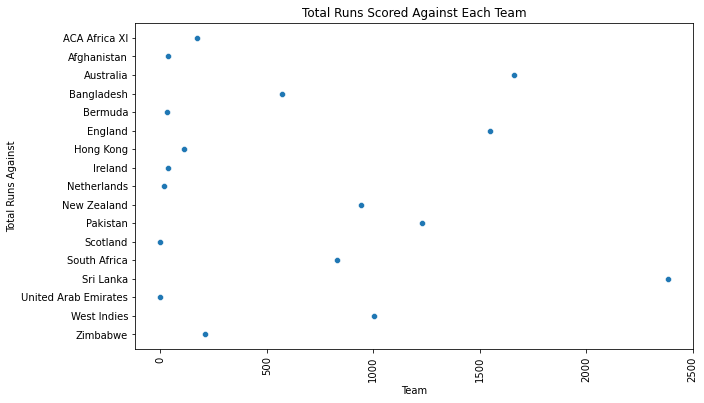

In [49]:
value = data.groupby('Versus')['Runs'].sum().values
label = data.groupby('Versus')['Runs'].sum().index

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=value, y=label)
plt.xticks(rotation=90)
plt.xlabel('Team')
plt.ylabel('Total Runs Against')
plt.title('Total Runs Scored Against Each Team')
plt.show()

In [85]:
value = data.groupby('Ground')['Runs'].sum().values
label = data.groupby('Ground')['Runs'].sum().index

fig = px.bar(data_frame=df, y=label, x=value, title="Total Runs Scored in each Ground",
             labels={"x": "Total Runs", "y": "Ground"}, color=label)

fig.update_traces(marker=dict(line=dict(color='black', width=2)))
fig.update_yaxes(type='category', categoryorder='total ascending')

fig.show()

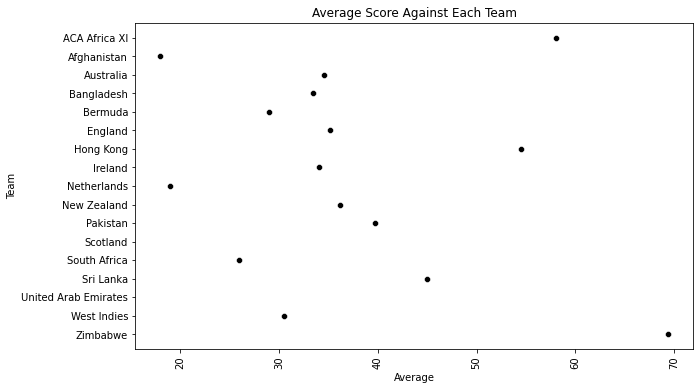

In [86]:
value = data.groupby('Versus')['Runs'].mean().values
label = data.groupby('Versus')['Runs'].sum().index

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=value, y=label, color='black')
plt.xticks(rotation=90)
plt.xlabel('Average')
plt.ylabel('Team')
plt.title('Average Score Against Each Team')
plt.show()

In [93]:

data['S/R'] = pd.to_numeric(data['S/R'], errors='coerce')
value = data.groupby('Versus')['S/R'].mean().values
label = data.groupby('Versus')['S/R'].sum().index
fig = px.bar(data_frame=df, y=label, x=value, title="Strike Rate Against Each Team",
             labels={"x": "Strike Rate", "y": "Team"}, color=label)

fig.update_traces(marker=dict(line=dict(color='black', width=2)))
fig.update_yaxes(type='category', categoryorder='total ascending')

fig.show()

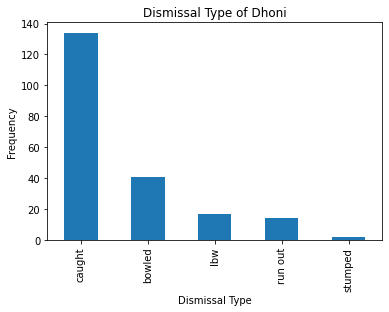

In [112]:
dk=pd.read_csv('ms_dhoni.csv')
dismissals = dk[~dk['How Dismissed'].isin(['did not bat', 'not out'])]['How Dismissed'].value_counts()


# Plot the bar graph
dismissals.plot(kind='bar')

# Add labels and title
plt.xlabel('Dismissal Type')
plt.ylabel('Frequency')
plt.title('Dismissal Type of Dhoni')

# Display the plot
plt.show()








Perera          6
Anderson        6
Brett Lee       5
Shoaib Malik    4
Bresnan         4
               ..
Watson          1
Ireland         1
Ryder           1
Mills           1
Rashid Khan     1
Name: Bowler, Length: 118, dtype: int64


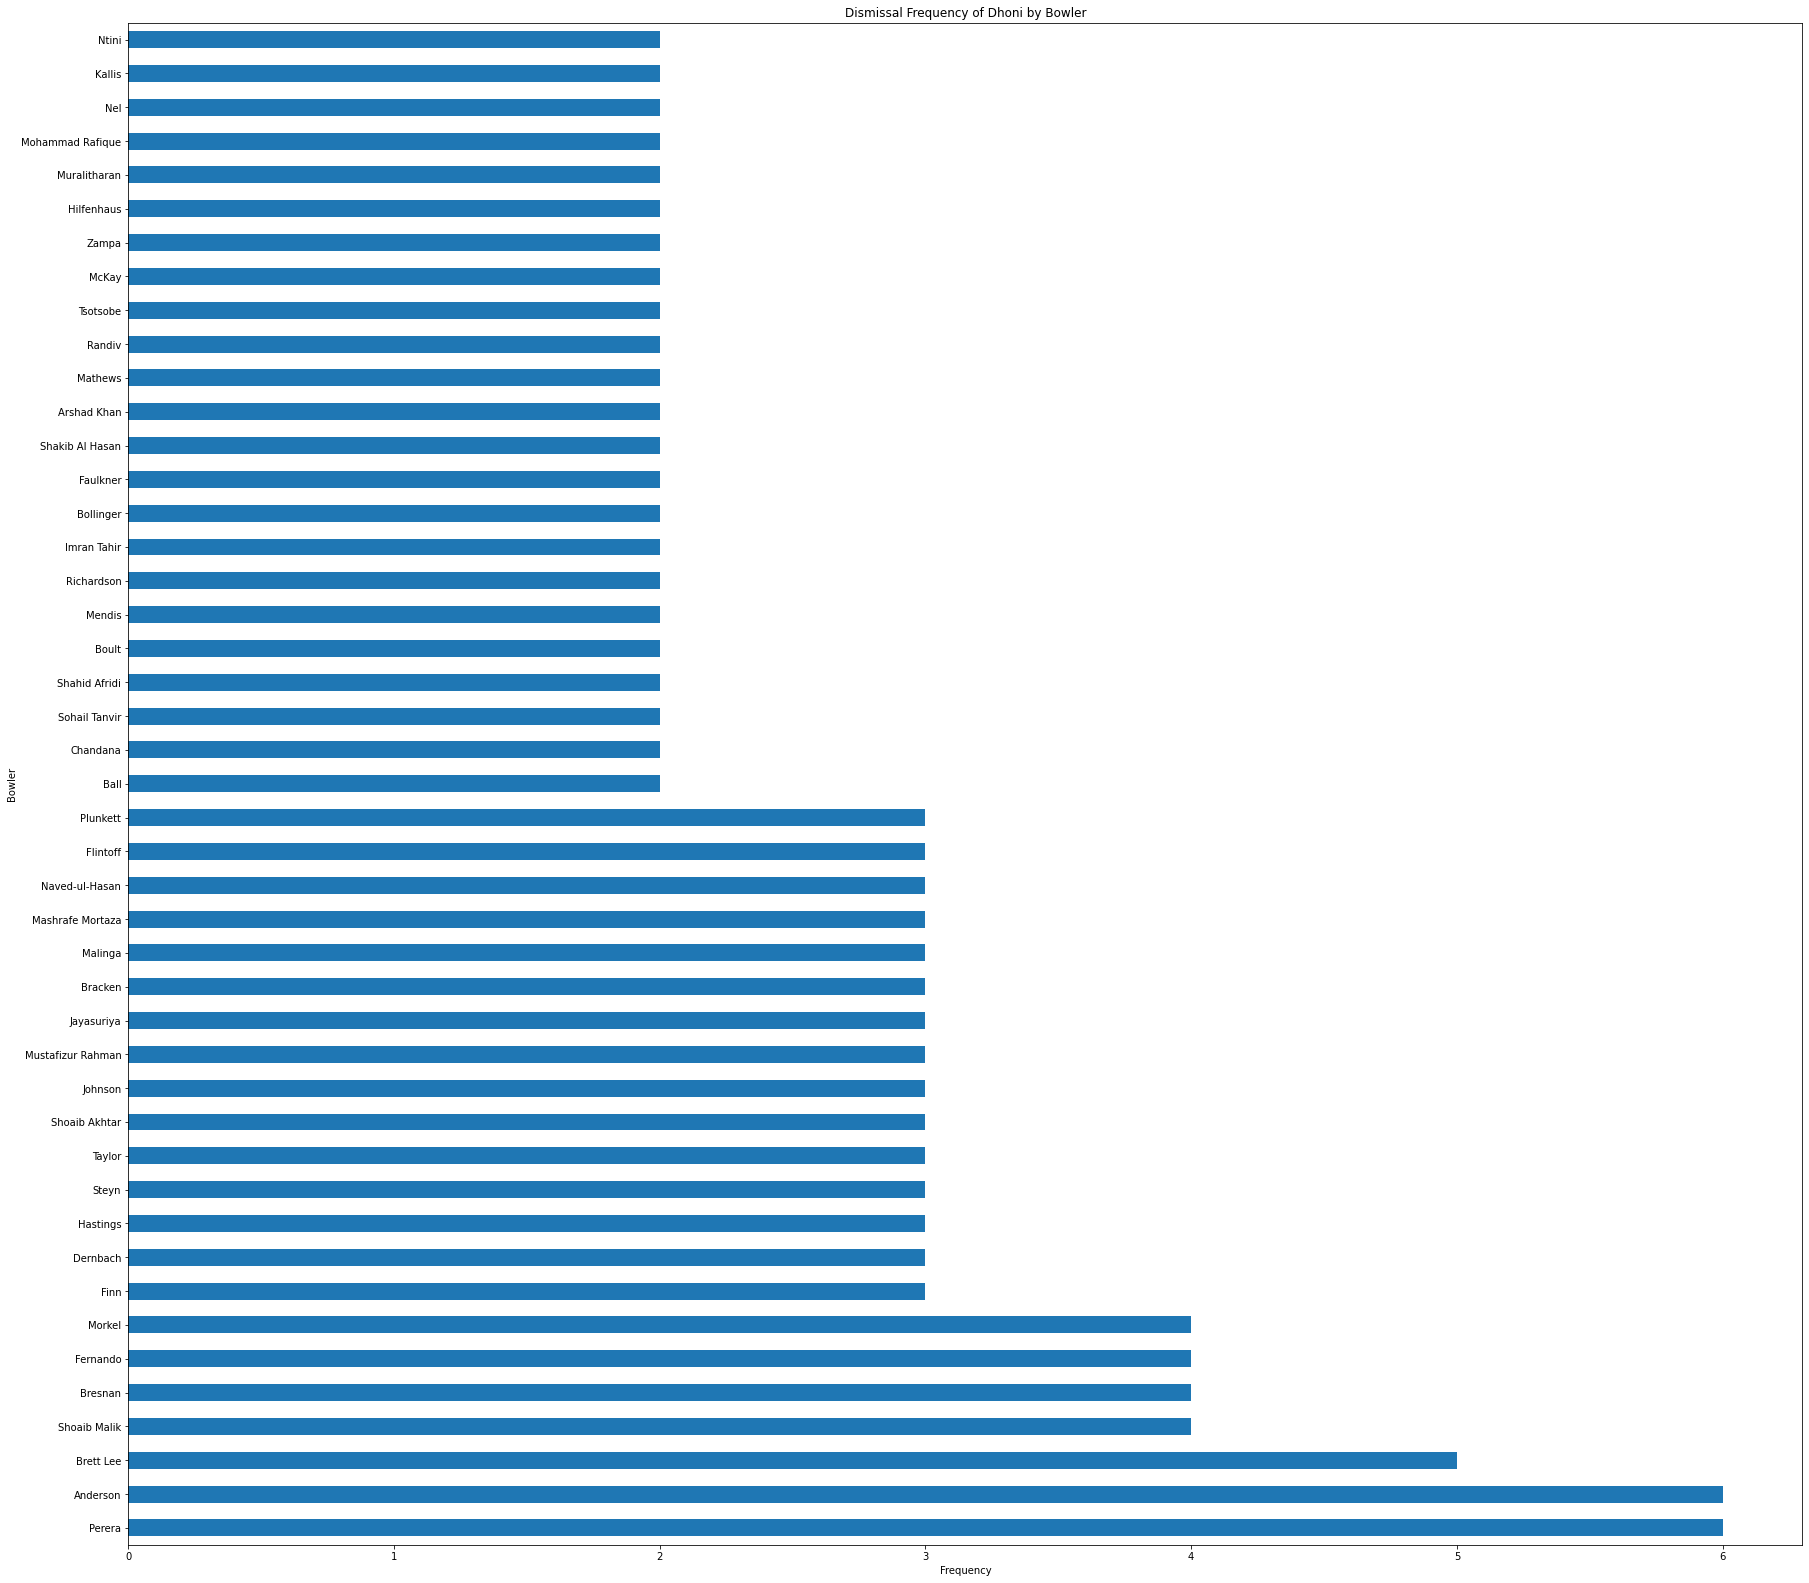

In [152]:
dismissals = dk[~dk['Bowler'].isin(['did not bat', 'not out', 'run out'])]['Bowler'].value_counts()
print(dismissals)
dismissals = dismissals[dismissals > 1]
plt.figure(figsize=(30, 28))
dismissals.plot(kind='barh')

plt.xlabel('Frequency')
plt.ylabel('Bowler')
plt.title('Dismissal Frequency of Dhoni by Bowler')

plt.show()
